## Day 16 - MACD
MACD states for Moving Average Convergence Divergence. It is defined as the difference among the long-term EMA (26 periods) and the short-term EMA (12 periods). So, as a consequence it will have a positive value when the short-term EMA is above the long-term one. Finally, the signal line is defined as a 9-EMA on the MACD values. 

$$ MACD = EMA_{w=26} - EMA_{w=12} $$

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [9]:
"""
    :param ticker: closing prices
    :param start: history start date
    :param end: history end date
    :return: stock's historical data 
"""
def get_data(ticker,start="2020-03-25"):
    return yf.download(ticker, start)

"""
    :param close: closing prices
    :param length: moving average length
    :return: stock's exponential moving average (EMA)
    
"""
def get_EMA(close,length):
    return close.ewm(span=length, adjust=False).mean()


"""
    :param close: closing prices
    :return MACD: MACD values
    :return signal: signal, calculated as a 9 day EMA on the MACD
"""
def get_MACD(close):
    macd = get_EMA(close,26) - get_EMA(close,12)
    signal = get_EMA(macd,9)
    return signal, macd


In [4]:
stock_history  = get_data('TWTR','2018-03-06')
stock_close = stock_history['Adj Close']

signal, macd = get_MACD(stock_close)

[*********************100%***********************]  1 of 1 completed


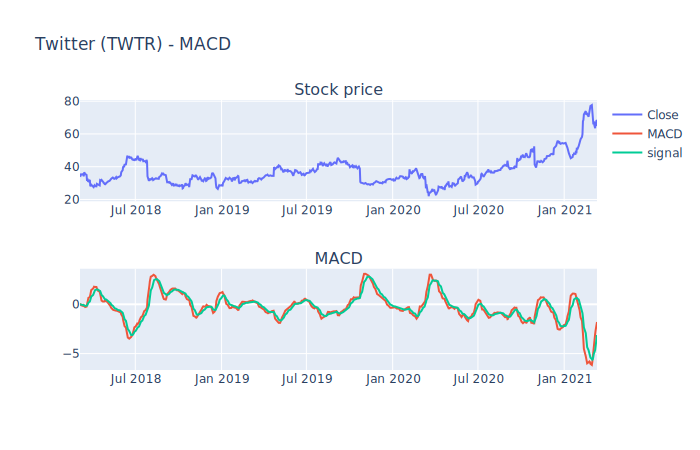

In [12]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Stock price", "MACD"))

fig.add_trace(go.Scatter(x=stock_close.index, y=stock_close, name='Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=macd.index, y=macd, name='MACD'),row=2, col=1)
fig.add_trace(go.Scatter(x=signal.index, y=signal, name='signal'),row=2, col=1)
#fig.add_hline(y=30,row=2, col=1, line_color="green")
#fig.add_hline(y=70,row=2, col=1, line_color="red")


fig.update_layout(title_text="Twitter (TWTR) - MACD",height=700)
# fig.show()

# static rendering for github
fig.show("svg")